# Analisis de datos


## Librerias a utilizar

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


In [10]:
# Cargar el dataset
df = pd.read_csv('Exportaciones_agr_colas_no_tradicionales_y_tradicionales_20241031.csv')

df.head()

,Partida,Descripcion Partida10 Dig,Tradición productos,Departamento,Pais,Año,Mes,Exportaciones en valor (Miles USD FOB),Exportaciones en volumen (Toneladas)
0,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2019,Abril,0,0
1,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2020,Febrero,0,0
2,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Enero,0,0
3,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Abril,0,0
4,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2023,Junio,0,0


# Exportaciones agrícolas no tradicionales y tradicionales
Este conjunto de datos presenta la información de las exportaciones del sector agrícola medidas en dólares FOB y toneladas. Las exportaciones presentadas abarcan el ámbito de OMC y pesca.


In [19]:

# Definir los datos en formato de diccionario
data_info = {
    "Nombre de la columna": [
        "Tradición productos", "Partida", "Pais", "Mes", 
        "Exportaciones en volumen (Toneladas)", "Exportaciones en valor (Miles USD FOB)", 
        "Descripcion Partida10 Dig", "Departamento", "Año"
    ],
    "Descripción": [
        "Tipo de tradicionalidad del producto", "Subpartida arancelaria a 10 dígitos", 
        "País de destino de la exportación", "Mes", 
        "Cantidad de toneladas de la exportación", 
        "Valor de la exportación en miles de dólares FOB", 
        "Descripción de la subpartida arancelaria a 10 dígitos", 
        "Departamento de origen", "Año"
    ],
    "Nombre del campo API": [
        "tradici_n_productos", "partida", "pais", "mes", 
        "exportaciones_en_volumen", "exportaciones_en_valor_miles", 
        "descripcion_partida10_dig", "departamento", "a_o"
    ]
}

# Crear el DataFrame
df_info = pd.DataFrame(data_info)

df_info


,Nombre de la columna,Descripción,Nombre del campo API
0,Tradición productos,Tipo de tradicionalidad del producto,tradici_n_productos
1,Partida,Subpartida arancelaria a 10 dígitos,partida
2,Pais,País de destino de la exportación,pais
3,Mes,Mes,mes
4,Exportaciones en volumen (Toneladas),Cantidad de toneladas de la exportación,exportaciones_en_volumen
5,Exportaciones en valor (Miles USD FOB),Valor de la exportación en miles de dólares FOB,exportaciones_en_valor_miles
6,Descripcion Partida10 Dig,Descripción de la subpartida arancelaria a 10 ...,descripcion_partida10_dig
7,Departamento,Departamento de origen,departamento
8,Año,Año,a_o


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475785 entries, 0 to 475784
Data columns (total 9 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Partida                                 475785 non-null  int64 
 1   Descripcion Partida10 Dig               475785 non-null  object
 2   Tradición productos                     475785 non-null  object
 3   Departamento                            475785 non-null  object
 4   Pais                                    475785 non-null  object
 5   Año                                     475785 non-null  int64 
 6   Mes                                     475785 non-null  object
 7   Exportaciones en valor (Miles USD FOB)  475785 non-null  int64 
 8   Exportaciones en volumen (Toneladas)    475785 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 32.7+ MB


In [5]:
df.describe()

,Partida,Año,Exportaciones en valor (Miles USD FOB),Exportaciones en volumen (Toneladas)
count,4.757850e+05,475785.000000,475785.000000,475785.000000
mean,1.355740e+09,2021.371777,110.950982,64.708049
std,7.618771e+08,1.609222,943.437868,714.815422
min,1.012100e+08,2019.000000,0.000000,0.000000
25%,7.129010e+08,2020.000000,0.000000,0.000000
50%,1.211903e+09,2021.000000,1.000000,0.000000
75%,2.005700e+09,2023.000000,17.000000,4.000000
max,5.302900e+09,2024.000000,92600.000000,60979.000000


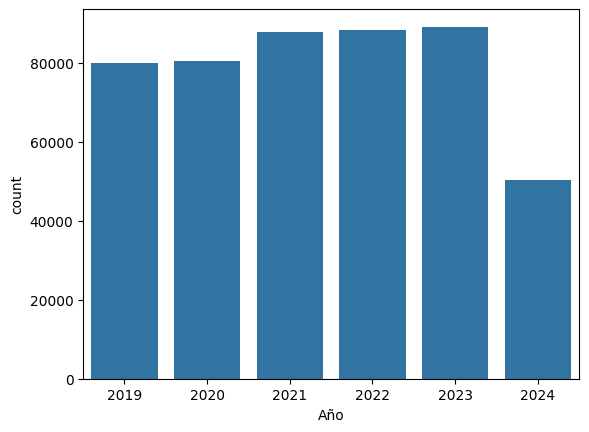

In [9]:
# Ejemplo de visualización: Exportaciones por año
sns.countplot(x='Año', data=df)
plt.show()

<Axes: >

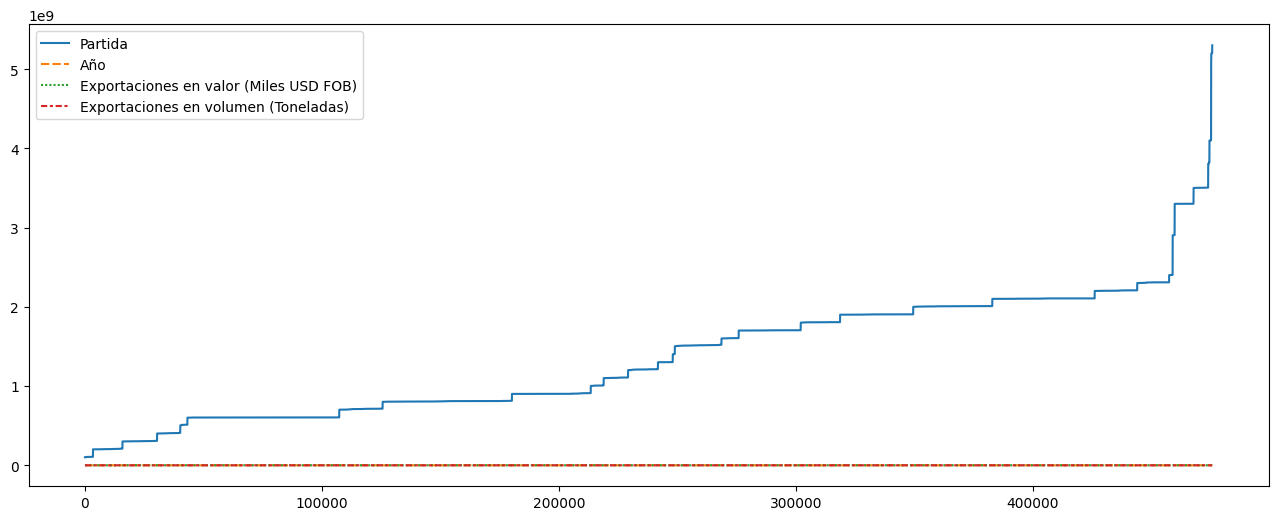

In [13]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=df)

In [16]:
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

# Buscar valores duplicados
valores_duplicados = df.duplicated().sum()
print("Número de filas duplicadas:")
print(valores_duplicados)

if valores_nulos.sum() == 0 and valores_duplicados == 0:
    print("No hay valores nulos ni duplicados.")

Valores nulos por columna:
Partida                                   0
Descripcion Partida10 Dig                 0
Tradición productos                       0
Departamento                              0
Pais                                      0
Año                                       0
Mes                                       0
Exportaciones en valor (Miles USD FOB)    0
Exportaciones en volumen (Toneladas)      0
dtype: int64
Número de filas duplicadas:
0
No hay valores nulos ni duplicados.


In [17]:
# Verificar tipos de datos
tipos_datos = df.dtypes
print("Tipos de datos por columna:")
print(tipos_datos)

Tipos de datos por columna:
Partida                                    int64
Descripcion Partida10 Dig                 object
Tradición productos                       object
Departamento                              object
Pais                                      object
Año                                        int64
Mes                                       object
Exportaciones en valor (Miles USD FOB)     int64
Exportaciones en volumen (Toneladas)       int64
dtype: object


## Manejo de variables categoricas



In [22]:
# Filtrar las columnas que son de tipo 'object'
variables_categoricas = df.select_dtypes(include=['object']).columns
print("Variables categóricas:")
print(variables_categoricas)

Variables categóricas:
Index(['Descripcion Partida10 Dig', 'Tradición productos', 'Departamento',
       'Pais', 'Mes'],
      dtype='object')


In [29]:
# Obtener los valores únicos de las columnas categóricas
descripcion_partida10_dig = df["Descripcion Partida10 Dig"].unique()
tradicion_productos = df["Tradición productos"].unique()
departamento = df["Departamento"].unique()
pais = df["Pais"].unique()
mes = df["Mes"].unique()
mes

array(['Abril', 'Febrero', 'Enero', 'Junio', 'Marzo', 'Diciembre', 'Mayo',
       'Julio', 'Septiembre', 'Octubre', 'Noviembre', 'Agosto'],
      dtype=object)

In [34]:
# Imprimir Descripcion Partida10 Dig con identificadores
print("-" * 70)
print("|{:^50}|{:^10}|{:^10}|".format("Descripcion Partida10 Dig", "ID", "Cant_Val"))
print("-" * 70)
id_desc = 1
cant_vals_desc = 0
for desc in descripcion_partida10_dig:
    cant = len(df[df["Descripcion Partida10 Dig"] == desc])
    print("|{:^50}|{:^10}|{:^10}|".format(desc, id_desc, cant))
    id_desc += 1
    cant_vals_desc += cant
print("-" * 70)
print("Total valores:", cant_vals_desc)

# Imprimir Tradición productos con identificadores
print("-" * 46)
print("|{:^20}|{:^10}|{:^10}|".format("Tradición productos", "ID", "Cant_Val"))
print("-" * 46)
id_trad = 1
cant_vals_trad = 0
for trad in tradicion_productos:
    cant = len(df[df["Tradición productos"] == trad])
    print("|{:^20}|{:^10}|{:^10}|".format(trad, id_trad, cant))
    id_trad += 1
    cant_vals_trad += cant
print("-" * 46)
print("Total valores:", cant_vals_trad)

# Imprimir Departamento con identificadores
print("-" * 46)
print("|{:^20}|{:^10}|{:^10}|".format("Departamento", "ID", "Cant_Val"))
print("-" * 46)
id_dep = 1
cant_vals_dep = 0
for dep in departamento:
    cant = len(df[df["Departamento"] == dep])
    print("|{:^20}|{:^10}|{:^10}|".format(dep, id_dep, cant))
    id_dep += 1
    cant_vals_dep += cant
print("-" * 46)
print("Total valores:", cant_vals_dep)

# Imprimir Pais con identificadores
print("-" * 46)
print("|{:^20}|{:^10}|{:^10}|".format("Pais", "ID", "Cant_Val"))
print("-" * 46)
id_pais = 1
cant_vals_pais = 0
for pais_ in pais:
    cant = len(df[df["Pais"] == pais_])
    print("|{:^20}|{:^10}|{:^10}|".format(pais_, id_pais, cant))
    id_pais += 1
    cant_vals_pais += cant
print("-" * 46)
print("Total valores:", cant_vals_pais)

# Imprimir Mes con identificadores
print("-" * 46)
print("|{:^20}|{:^10}|{:^10}|".format("Mes", "ID", "Cant_Val"))
print("-" * 46)
id_mes = 1
cant_vals_mes = 0
for mes_ in mes:
    cant = len(df[df["Mes"] == mes_])
    print("|{:^20}|{:^10}|{:^10}|".format(mes_, id_mes, cant))
    id_mes += 1
    cant_vals_mes += cant
print("-" * 46)
print("Total valores:", cant_vals_mes)


----------------------------------------------------------------------
|            Descripcion Partida10 Dig             |    ID    | Cant_Val |
----------------------------------------------------------------------
|    Caballos reproductores de raza pura, vivos    |    1     |   248    |
|            Los demás caballos, vivos             |    2     |   166    |
|                   Asnos vivos                    |    3     |    28    |
|            Mulos y Burdéganos, Vivos             |    4     |    12    |
|Bovinos domésticos vivos reproductores de raza pura, hembras|    5     |    23    |
|Bovinos domésticos vivos reproductores de raza pur|    6     |    15    |
|       Bovinos domésticos vivos para lidia        |    7     |    2     |
|    Los demás bovinos domésticos vivos, machos    |    8     |   126    |
|Reproductores de raza pura, de la especie porcina |    9     |    10    |
|Animales vivos de la especie porcina, de peso inferior a 50 Kg|    10    |    1     |
|Animales v

Añadimos 5 columans nuevas en el dataset para poder trabajar con los datos categóricos de una manera más sencilla. colocando un identificador único para cada valor de las columnas categóricas.

In [38]:
df["Descripcion_Partida10_Dig_id"] =  df["Descripcion Partida10 Dig"].apply(lambda x: np.where(descripcion_partida10_dig == x)[0][0]+1)
df["Tradicion_productos_id"] =  df["Tradición productos"].apply(lambda x: np.where(tradicion_productos == x)[0][0]+1)
df["Departamento_id"] =  df["Departamento"].apply(lambda x: np.where(departamento == x)[0][0]+1)
df["Pais_id"] =  df["Pais"].apply(lambda x: np.where(pais == x)[0][0]+1)
df["Mes_id"] =  df["Mes"].apply(lambda x: np.where(mes == x)[0][0]+1)



visualizamos las columnas nuevas del dataset

In [39]:
df.head()

,Partida,Descripcion Partida10 Dig,Tradición productos,Departamento,Pais,Año,Mes,Exportaciones en valor (Miles USD FOB),Exportaciones en volumen (Toneladas),Descripcion_Partida10_Dig_id,Tradicion_productos_id,Departamento_id,Pais_id,Mes_id
0,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2019,Abril,0,0,1,1,1,1,1
1,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2020,Febrero,0,0,1,1,1,1,2
2,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Enero,0,0,1,1,1,1,3
3,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Abril,0,0,1,1,1,1,1
4,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2023,Junio,0,0,1,1,1,1,4


## Correlación de las variables


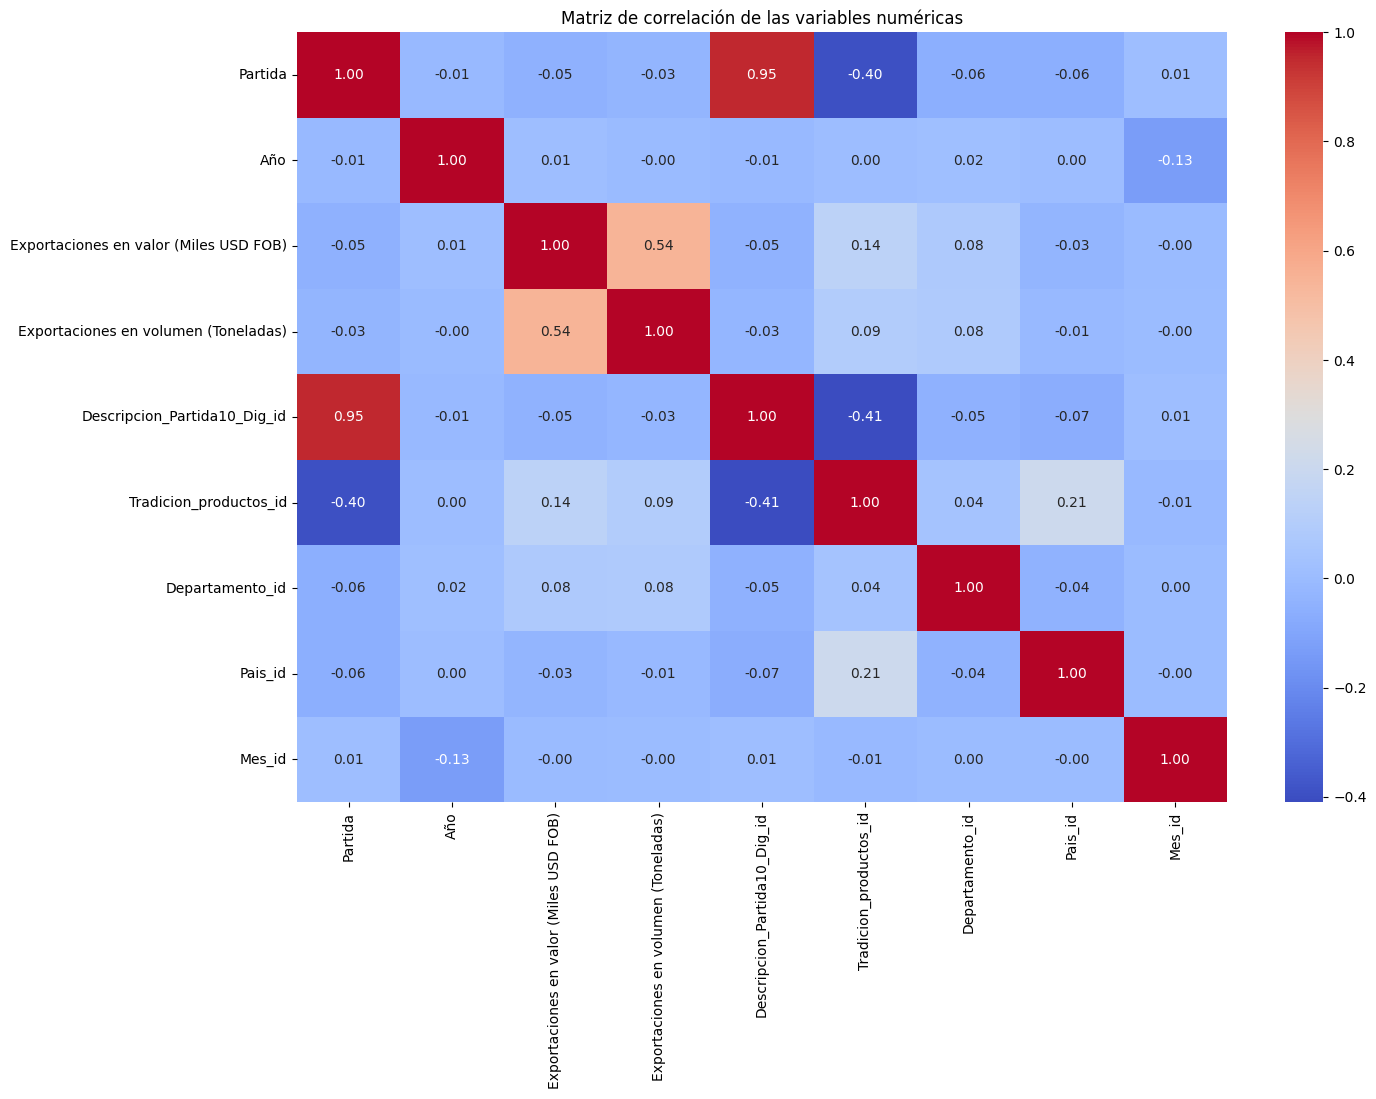

In [45]:
# selccionamos las columnas numericas
df_numeric = df.select_dtypes(include=[np.number])
# calculamos la matriz de correlación
correlation_matrix = df_numeric.corr()
# visualizamos la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de las variables numéricas")
plt.show()

## Elección de variables dependientes e independientes